In [1]:
# # General
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import random

# # Path process
# import os
# import os.path
# from pathlib import Path

# # Image process
# from PIL import Image
# from keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import imageio
# from IPython.display import Image
# import matplotlib.image as mpimg

# # Audio process
# import pydub
# from scipy.io.wavfile import read, write
# import librosa
# import librosa.display
# import IPython
# from IPython.display import Audio
# import scipy

# # Scalar & Transformation
# from keras.utils.np_utils import to_categorical
# from keras import regularizers

# # Accuracy control

# # Optimizer
# from tensorflow.keras.optimizers import RMSprop, Adam, Optimizer, SGD

# # Model layers
# import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, \
# BatchNormalization, MaxPooling2D, Permute, TimeDistributed, \
# Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, \
# ZeroPadding2D, Convolution2D, Reshape, Conv2DTranspose, LeakyReLU, \
# Conv1D, AveragePooling1D, MaxPooling1D, MaxPool1D, GlobalAvgPool1D
# from keras import models
# from keras import layers
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16, VGG19, inception_v3
# from keras import backend as K
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras import regularizers

# # Sklearn classifier

In [56]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg

#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy

#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D, MaxPool1D, GlobalAvgPool1D
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import keras
from tensorflow.keras import regularizers

#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [2]:
########## Path, Label, Transfromation ##########
set_a_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_a.csv")
set_b_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b.csv")

In [ ]:
print(set_a_data.head(-1))

    dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
170       a          set_a/__201108222234.wav       NaN       NaN
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN

[175 rows x 4 columns]


In [ ]:
print(set_a_data["label"].value_counts())

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [ ]:
print(set_b_data.head(-1))

    dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2     

In [ ]:
print(set_b_data["label"].value_counts())

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64


In [3]:
##### To Concat #####
dataframes = [set_a_data, set_b_data]
concat_data = pd.concat(dataframes)

In [ ]:
print(concat_data.head(-1))

    dataset                                              fname     label  \
0         a                   set_a/artifact__201012172012.wav  artifact   
1         a                   set_a/artifact__201105040918.wav  artifact   
2         a                   set_a/artifact__201105041959.wav  artifact   
3         a                   set_a/artifact__201105051017.wav  artifact   
4         a                   set_a/artifact__201105060108.wav  artifact   
..      ...                                                ...       ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3          

In [4]:
concat_data.drop(["sublabel", "dataset"], axis="columns", inplace=True)

In [ ]:
print(concat_data.head(-1))

                                                 fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[831 rows x 2 columns]


In [5]:
print(concat_data["label"].value_counts())

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64


In [6]:
concat_data = concat_data.dropna()

In [7]:
print(concat_data.head(-1))

                                                 fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[584 rows x 2 columns]


In [8]:
# 나중에 지움...?
concat_data = concat_data.reset_index()

In [9]:
print(concat_data.head(-1))

     index                                              fname     label
0        0                   set_a/artifact__201012172012.wav  artifact
1        1                   set_a/artifact__201105040918.wav  artifact
2        2                   set_a/artifact__201105041959.wav  artifact
3        3                   set_a/artifact__201105051017.wav  artifact
4        4                   set_a/artifact__201105060108.wav  artifact
..     ...                                                ...       ...
579    650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
580    651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
581    652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
582    653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
583    654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[584 rows x 3 columns]


In [10]:
print(concat_data.isnull().sum())

index    0
fname    0
label    0
dtype: int64


In [11]:
concat_data.drop("index", axis="columns", inplace=True)

In [ ]:
print(concat_data.head(-1))

                                                 fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
579  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
580  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
581  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
582  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
583  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[584 rows x 2 columns]


In [12]:
##### To Create New Dataframe #####
path_wav_list = []
category_list = []
pre_path = "/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/"

for path_number in range(len(concat_data)):
  file_path_name = pre_path + str(concat_data["fname"][path_number])
  path_wav_list.append(file_path_name)
  category_list.append(concat_data["label"][path_number])

In [ ]:
print(path_wav_list[:4])

['/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_a/artifact__201012172012.wav', '/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_a/artifact__201105040918.wav', '/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_a/artifact__201105041959.wav', '/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_a/artifact__201105051017.wav']


In [ ]:
print(category_list[:4])

['artifact', 'artifact', 'artifact', 'artifact']


In [74]:
# # 내멋대로 코드3. 확인용
# for i in range(400, 500):
#   print(path_wav_list[i])

/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_238_1309194586293_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_250_1309202496494_A.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_250_1309202496494_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_252_1309203336604_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_256_1309351470137_A.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_258_1309352253234_C.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_260_1309353164458_C.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_261_1309353556003_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_262_1309355283807_A.wav
/content/drive/MyDr

In [71]:
# # 내멋대로 코드. set_b 이름 바꾸기
# file_name_partial = []
# for i, path_name in enumerate(path_wav_list):
#   partial_path = path_name.split("/")
#   if(partial_path[-2] == "set_b"):
#     partial_file = partial_path[-1].split("_")
#     if(partial_file[0] == "Btaining"):
#       partial_file = partial_file[1:]
#       partial_file[0] += "_"
#     partial_path[-1] = "_".join(partial_file)
#     modified_path_name = "/".join(partial_path)
#     path_wav_list[i] = modified_path_name

In [72]:
# # 내멋대로 코드2. 확인용
# for i in range(400, 500):
#   print(path_wav_list[i])

/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_238_1309194586293_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_250_1309202496494_A.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_250_1309202496494_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_252_1309203336604_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_256_1309351470137_A.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_258_1309352253234_C.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_260_1309353164458_C.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_261_1309353556003_B.wav
/content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_262_1309355283807_A.wav
/content/drive/MyDr

In [13]:
path_wav_series = pd.Series(path_wav_list, name="WAV").astype(str)
category_series = pd.Series(category_list, name="CATEGORY")

In [14]:
main_heartbeat_data = pd.concat([path_wav_series, category_series], axis=1)

In [15]:
# ...? 결국 라벨 이름만 바꾼겨?
print(main_heartbeat_data.head(-1))

                                                   WAV  CATEGORY
0    /content/drive/MyDrive/Colab Notebooks/Project...  artifact
1    /content/drive/MyDrive/Colab Notebooks/Project...  artifact
2    /content/drive/MyDrive/Colab Notebooks/Project...  artifact
3    /content/drive/MyDrive/Colab Notebooks/Project...  artifact
4    /content/drive/MyDrive/Colab Notebooks/Project...  artifact
..                                                 ...       ...
579  /content/drive/MyDrive/Colab Notebooks/Project...    normal
580  /content/drive/MyDrive/Colab Notebooks/Project...    normal
581  /content/drive/MyDrive/Colab Notebooks/Project...    normal
582  /content/drive/MyDrive/Colab Notebooks/Project...    normal
583  /content/drive/MyDrive/Colab Notebooks/Project...    normal

[584 rows x 2 columns]


In [16]:
##### To Shuffle #####
# 전체에서 100% data random select
main_heartbeat_data = main_heartbeat_data.sample(frac=1).reset_index(drop=True)

In [17]:
print(main_heartbeat_data["CATEGORY"].value_counts())

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: CATEGORY, dtype: int64


In [18]:
print(main_heartbeat_data.head(-1))

                                                   WAV    CATEGORY
0    /content/drive/MyDrive/Colab Notebooks/Project...      murmur
1    /content/drive/MyDrive/Colab Notebooks/Project...      murmur
2    /content/drive/MyDrive/Colab Notebooks/Project...      murmur
3    /content/drive/MyDrive/Colab Notebooks/Project...      normal
4    /content/drive/MyDrive/Colab Notebooks/Project...      murmur
..                                                 ...         ...
579  /content/drive/MyDrive/Colab Notebooks/Project...      normal
580  /content/drive/MyDrive/Colab Notebooks/Project...      normal
581  /content/drive/MyDrive/Colab Notebooks/Project...      murmur
582  /content/drive/MyDrive/Colab Notebooks/Project...  extrastole
583  /content/drive/MyDrive/Colab Notebooks/Project...      murmur

[584 rows x 2 columns]


In [19]:
##### To Save #####
concat_data.to_csv("new_heartbeat_doc.csv")
main_heartbeat_data.to_csv("main_heartbeat_doc.csv")

In [20]:
########## Process Function ##########
##### Noise #####
def noise_function(data):
  noise_value = 0.009 * np.random.uniform() * np.amax(data)
  data = data + noise_value * np.random.normal(size=data.shape[0])

  return data

In [21]:
##### Stretch Function #####
# rate만큼 배속, audio 0.6배속
def stretch_function(data, rate=0.6):
  
  return librosa.effects.time_stretch(data, rate)

In [22]:
##### Shift Function #####
# shift_range만큼 순환시킴(뒤에거 앞으로 가져옴)
def shift_function(data):
  shift_range = int(np.random.uniform(-3, 3) * 1000)

  return np.roll(data, shift_range)

In [23]:
##### Pitch Function #####
# 노래에서 키 올리고 낮추기: 한옥타브=12
def pitch_function(data, sampling_rate, pitch_factor=0.3):

  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [24]:
##### Specshow Function #####
def specshow_function(wav_path):
  figure, axis = plt.subplots(4, 1, figsize=(14, 6))

  audio_type, sample_rate = librosa.load(wav_path)
  stft_audio = librosa.stft(audio_type)
  db_audio = librosa.amplitude_to_db(abs(stft_audio))
  img_log = librosa.display.specshow(db_audio, sr=sample_rate, x_axis="time", y_axis="log", cmap="gray_r", ax=axis[0])
  axis[0].set(title="LOG")
  img_mel = librosa.display.specshow(db_audio, sr=sample_rate, x_axis="time", y_axis="mel", cmap="gray_r", ax=axis[1])
  axis[1].set(title="MEL")
  img_chroma = librosa.display.specshow(db_audio, sr=sample_rate, x_axis="time", y_axis="chroma", cmap="gray_r", ax=axis[2])
  axis[2].set(title="CHROMA")
  img_mel = librosa.display.specshow(db_audio, sr=sample_rate, x_axis="time", y_axis="hz", cmap="gray_r", ax=axis[3])
  axis[3].set(title="HZ")

  for ax_i in axis:
    ax_i.label_outer()
  
  figure.colorbar(img_log, ax=[axis[0], axis[1]])

  # Or have individual colorbars:
  figure.colorbar(img_chroma, ax=[axis[2], axis[3]])

  axis[0].set(xlim=[1,3])

In [26]:
##### Waveplot Function #####
def waveplot_function(wav_path):
  figure = plt.figure(figsize=(14,6))

  audio_type, sample_rate = librosa.load(wav_path)
  librosa.display.waveplot(audio_type, sr=sample_rate)

In [27]:
##### Playing Function #####
def playing_function(wav_path):
  
  audio_type, sample_rate = librosa.load(wav_path)
  return Audio(audio_type, rate=sample_rate)

In [28]:
##### Extract Function #####
def extract_function(data):
  output_result = np.array([])

  # np.hstack : 배열 옆으로 붙이기
  mean_zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
  output_result = np.hstack((output_result, mean_zero_crossing_rate))

  stft_output = np.abs(librosa.stft(data))
  chroma_mean = np.mean(librosa.feature.chroma_stft(S=stft_output, sr=sample_rate).T, axis=0)
  output_result = np.hstack((output_result, chroma_mean))

  mfcc_output = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
  output_result = np.hstack((output_result, mfcc_output))

  root_output = np.mean(librosa.feature.rms(y=data).T, axis=0)
  output_result = np.hstack((output_result, root_output))

  mel_output = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
  ouput_result = np.hstack((output_result, mel_output))

  return output_result

In [29]:
##### Export Function #####
def export_function(path):
  # 3.0초까지만 load
  data, sample_rate = librosa.load(path, duration=3.0)

  output_one = extract_function(data)
  result = np.array(output_one)

  noise_output = noise_function(data)
  output_two = extract_function(noise_output)
  # 수직으로 쌓기
  result = np.vstack((result, output_two))

  stretch_output = stretch_function(data)
  stretch_pitch = pitch_function(stretch_output, sample_rate)
  output_three = extract_function(stretch_pitch)
  result = np.vstack((result, output_three))

  return result

In [30]:
########## Analysis ##########
plt.style.use("dark_background")

In [31]:
##### Playing #####
try:
  playing_function(main_heartbeat_data["WAV"][300])
except Exception as error:
  print("NO DIRECTORY ERROR")

In [32]:
# set_b는 error?
playing_function(main_heartbeat_data["WAV"][300])

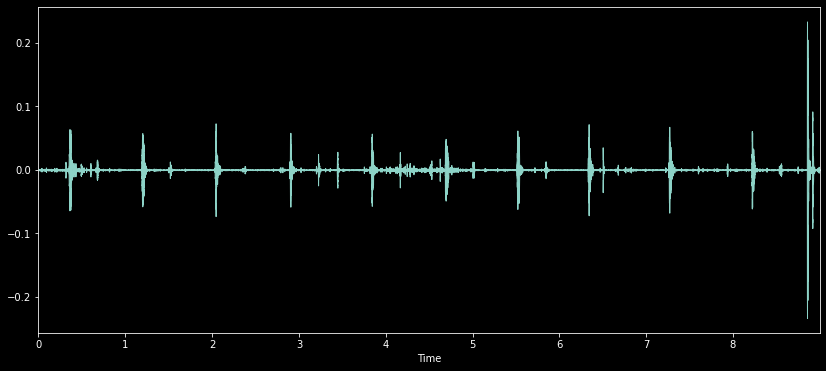

In [34]:
##### Waveplot #####
waveplot_function(main_heartbeat_data["WAV"][300])

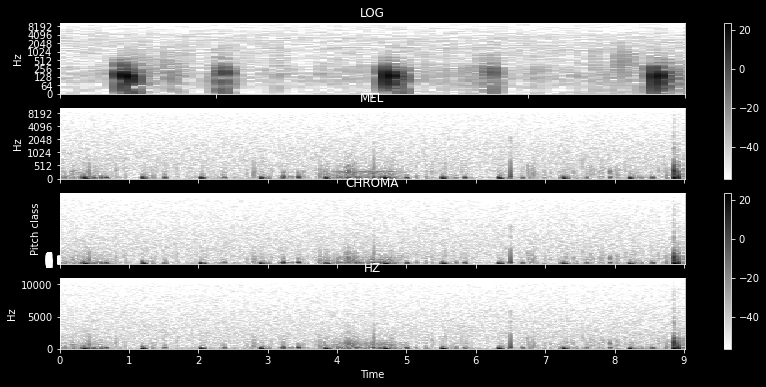

In [35]:
##### Specshow #####
specshow_function(main_heartbeat_data["WAV"][300])

In [36]:
##### Noise #####
wav_type, sample_rate = librosa.load(main_heartbeat_data["WAV"][300])
noise_audio = noise_function(wav_type)
Audio(noise_audio, rate=sample_rate)

In [37]:
##### Stretch #####
wav_type, sample_rate = librosa.load(main_heartbeat_data["WAV"][300])
stretch_audio = stretch_function(wav_type)
Audio(stretch_audio, rate=sample_rate)

In [38]:
##### Shift #####
wav_type, sample_rate = librosa.load(main_heartbeat_data["WAV"][300])
shift_audio = shift_function(wav_type)
Audio(shift_audio, rate=sample_rate)

In [39]:
##### Pitch #####
wav_type, sample_rate = librosa.load(main_heartbeat_data["WAV"][300])
pitch_audio = pitch_function(wav_type, sample_rate)
Audio(pitch_audio, rate=sample_rate)

In [40]:
##### Simple Checking #####
wav_type, sample_rate = librosa.load(main_heartbeat_data["WAV"][300])

print(wav_type.shape)
print(wav_type.dtype)
print(sample_rate)

(198450,)
float32
22050


In [41]:
########## Data Process And Engineering ##########
sample_rate = 22050

In [42]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [43]:
# set_b의 name error. error 다 버린건가?
x_train = []
y_train = []

for path, category_wav in zip(main_heartbeat_data.WAV, main_heartbeat_data.CATEGORY):
  try:
    wav_features = export_function(str(path))

    for indexing in wav_features:
      x_train.append(indexing)
      y_train.append(category_wav)
    
  except Exception as e:
    print("NO DIRECTORY ERROR: ", path)

NO DIRECTORY ERROR:  /content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_murmur_281_1311165683454_A.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_murmur_Btraining_noisymurmur_161_1307101199321_B.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_murmur_281_1311165683454_D.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_Btraining_noisynormal_134_1306428161797_D1.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_murmur_244_1309198148498_B.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_normal_274_1311075637574_B1.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Colab Notebooks/Project/HeartBeat/Data/set_b/Btraining_murmur_248_1309201683806_A.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/

In [44]:
new_heartbeat_wav = pd.DataFrame(x_train)
new_heartbeat_wav["CATEGORY"] = y_train

new_heartbeat_wav.to_csv("new_wav_heartbeat_data.csv", index=False)

In [45]:
print(new_heartbeat_wav.head(-1))

            0         1         2         3         4         5         6  \
0    0.052152  0.832087  0.828026  0.837503  0.827401  0.827375  0.825336   
1    0.125815  0.872917  0.880144  0.892830  0.891500  0.906379  0.837779   
2    0.029019  0.826811  0.812794  0.823194  0.820914  0.752476  0.741053   
3    0.037515  0.796407  0.855949  0.743898  0.712919  0.751404  0.747849   
4    0.070305  0.834185  0.868529  0.775428  0.760672  0.801025  0.768359   
..        ...       ...       ...       ...       ...       ...       ...   
366  0.007441  0.715184  0.666423  0.664424  0.641726  0.702426  0.853346   
367  0.131340  0.777525  0.760585  0.754801  0.767186  0.853220  0.892632   
368  0.006926  0.698612  0.663831  0.663751  0.631012  0.648889  0.782159   
369  0.034379  0.843773  0.851849  0.832464  0.811758  0.804386  0.788049   
370  0.087658  0.873862  0.864297  0.868512  0.859924  0.855041  0.827070   

            7         8         9  ...        25        26        27  \
0  

In [46]:
print(new_heartbeat_wav["CATEGORY"].value_counts())

artifact    120
murmur      102
normal       93
extrahls     57
Name: CATEGORY, dtype: int64


In [47]:
# test1
path_temp = main_heartbeat_data["WAV"][300]
data_temp, sample_rate = librosa.load(path_temp, duration=3.0)
output_temp = extract_function(data_temp)
print(output_temp.shape)

(34,)


In [49]:
# test2
result_temp = np.array([])

# np.hstack : 배열 옆으로 붙이기
mean_zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data_temp).T, axis=0)
result_temp = np.hstack((result_temp, mean_zero_crossing_rate))

print(librosa.feature.zero_crossing_rate(y=data_temp).shape)
print(mean_zero_crossing_rate.shape)
print(result_temp.shape)

# stft_output = np.abs(librosa.stft(data))
# chroma_mean = np.mean(librosa.feature.chroma_stft(S=stft_output, sr=sample_rate).T, axis=0)
# output_result = np.hstack((output_result, chroma_mean))

# mfcc_output = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
# output_result = np.hstack((output_result, mfcc_output))

# root_output = np.mean(librosa.feature.rms(y=data).T, axis=0)
# output_result = np.hstack((output_result, root_output))

# mel_output = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
# ouput_result = np.hstack((output_result, mel_output))

(1, 130)
(1,)
(1,)


In [58]:
##### Splitting And Pre-training process #####
encoder_function = OneHotEncoder()
scalar_function = MinMaxScaler()

In [59]:
values_x = new_heartbeat_wav.iloc[:,:-1].values
labels_x = new_heartbeat_wav["CATEGORY"].values

In [60]:
print(values_x.shape)
print(labels_x.shape)

(372, 34)
(372,)


In [62]:
labels_x_encode = encoder_function.fit_transform(np.array(labels_x).reshape(-1, 1)).toarray()

In [66]:
print(labels_x_encode[:10])

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [67]:
print(labels_x_encode.shape)

(372, 4)


In [68]:
xTrain, xTest, yTrain, yTest = train_test_split(values_x, labels_x_encode, train_size=0.9, random_state=42, shuffle=True)

In [69]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(334, 34)
(334, 4)
(38, 34)
(38, 4)


In [70]:
xTrain = np.expand_dims(xTrain, axis=2)
xTest = np.expand_dims(xTest, axis=2)

In [71]:
print(xTrain.shape)
print(xTest.shape)

(334, 34, 1)
(38, 34, 1)


In [81]:
########## Model Structure ############
##### Parameters #####
output_dim = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (xTrain.shape[1], 1)

In [74]:
##### Callbacks #####
early_stopper = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3, mode="min")
checkpoint_model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy", save_best_only=True, save_weights_only=True, filepath="./modelcheck")

In [77]:
##### Structure #####
model = Sequential()

model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu", input_shape=input_shape_dim))
model.add(BatchNormalization())
model.add(MaxPooling1D(3, strides=2, padding="same"))

model.add(Conv1D(256, 4, strides=1, padding="same", activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling1D(3, strides=2, padding="same"))

model.add(Conv1D(128, 4, strides=1, padding="same", activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling1D(3, strides=2, padding="same"))

model.add(Conv1D(64, 4, strides=1, padding="same", activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling1D(3, strides=2, padding="same"))

model.add(Conv1D(32, 4, strides=1, padding="same", activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling1D(3, strides=2, padding="same"))


model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=output_dim, activation="softmax"))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 34, 256)           1536      
                                                                 
 batch_normalization (BatchN  (None, 34, 256)          1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 17, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 256)           262400    
                                                                 
 dropout (Dropout)           (None, 17, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 256)          

In [83]:
model.compile(optimizer=compile_optimizer, loss=compile_loss, metrics=compile_metrics)

In [85]:
conv1D_model = model.fit(xTrain, yTrain, batch_size=12, epochs=70, validation_data=(xTest, yTest), \
                         callbacks=[early_stopper, checkpoint_model])

Epoch 1/70
28/28 [==============================] - 1s 34ms/step - loss: 0.8162 - accuracy: 0.6228 - val_loss: 0.7690 - val_accuracy: 0.7105
Epoch 2/70
28/28 [==============================] - 1s 33ms/step - loss: 0.8221 - accuracy: 0.6527 - val_loss: 0.7486 - val_accuracy: 0.6316
Epoch 3/70
28/28 [==============================] - 1s 33ms/step - loss: 0.7497 - accuracy: 0.6587 - val_loss: 0.7244 - val_accuracy: 0.7105
Epoch 4/70
28/28 [==============================] - 1s 33ms/step - loss: 0.7669 - accuracy: 0.6886 - val_loss: 0.7606 - val_accuracy: 0.6842
Epoch 5/70
28/28 [==============================] - 1s 36ms/step - loss: 0.7333 - accuracy: 0.6737 - val_loss: 0.7591 - val_accuracy: 0.7368
Epoch 6/70
28/28 [==============================] - 1s 34ms/step - loss: 0.7625 - accuracy: 0.6347 - val_loss: 0.8206 - val_accuracy: 0.7368
Epoch 7/70
28/28 [==============================] - 1s 34ms/step - loss: 0.7199 - accuracy: 0.6587 - val_loss: 0.7587 - val_accuracy: 0.6842
Epoch 8/70
28

In [86]:
myTest_model = model.fit(xTrain, yTrain, batch_size=12, epochs=70, validation_data=(xTest, yTest))

Epoch 1/70
28/28 [==============================] - 1s 36ms/step - loss: 0.6956 - accuracy: 0.6467 - val_loss: 0.7430 - val_accuracy: 0.6842
Epoch 2/70
28/28 [==============================] - 1s 37ms/step - loss: 0.7192 - accuracy: 0.6557 - val_loss: 0.8727 - val_accuracy: 0.4737
Epoch 3/70
28/28 [==============================] - 1s 38ms/step - loss: 0.7014 - accuracy: 0.7036 - val_loss: 0.7449 - val_accuracy: 0.7105
Epoch 4/70
28/28 [==============================] - 1s 36ms/step - loss: 0.6725 - accuracy: 0.7216 - val_loss: 0.7431 - val_accuracy: 0.7105
Epoch 5/70
28/28 [==============================] - 1s 37ms/step - loss: 0.6966 - accuracy: 0.6737 - val_loss: 0.8255 - val_accuracy: 0.6842
Epoch 6/70
28/28 [==============================] - 1s 37ms/step - loss: 0.7089 - accuracy: 0.6647 - val_loss: 0.6988 - val_accuracy: 0.6316
Epoch 7/70
28/28 [==============================] - 1s 36ms/step - loss: 0.7344 - accuracy: 0.6617 - val_loss: 0.8064 - val_accuracy: 0.6579
Epoch 8/70
28

In [91]:
model_results = model.evaluate(xTest, yTest)
print("LOSS: " + "%.4f" % model_results[0])
print("ACCURACY: " + "%.4f" % model_results[1])

2/2 [==============================] - 0s 16ms/step - loss: 0.5455 - accuracy: 0.8421
LOSS: 0.5455
ACCURACY: 0.8421


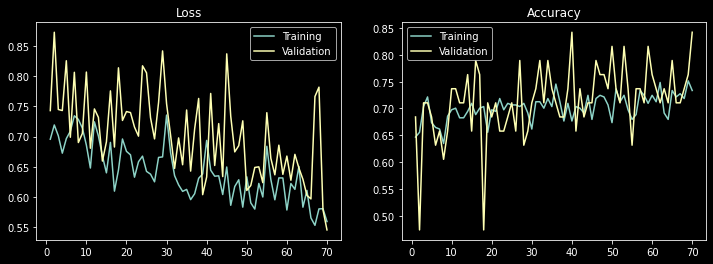

In [90]:
# 손실함수, 정확도 그래프
def plot_loss_acc(history, epoch):
  
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc="best")
  axes[0].set_title("Loss")

  axes[1].plot(range(1, epoch+1), acc, label="Training")
  axes[1].plot(range(1, epoch+1), val_acc, label="Validation")
  axes[1].legend(loc="best")
  axes[1].set_title("Accuracy")

  plt.show()

plot_loss_acc(myTest_model, 70)